# breast_cancer

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql 

# Ignore Harmfull warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the Breast cancer dataset

bcdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\50 season bagging 30-jul-2021\breast_cancer.csv",header= 0)
bcdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Display the information of dataset

bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Display the unique values of each variable

bcdata.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [5]:
# Delete the varaiables which are not impacting the target variable
del bcdata['Unnamed: 32']
del bcdata['id']

In [6]:
# Identify the dependent and target variables

IndepVar = []
for col in bcdata.columns:
    if col != 'diagnosis':
        IndepVar.append(col)
        
TargetVar = 'diagnosis'

x = bcdata[IndepVar]
y = bcdata[TargetVar]
    

In [7]:
# Import LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
y = pd.DataFrame(y)

In [8]:
# split the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=12)

# copy the test data to back-up file

x_test_F1 = x_test.copy()

In [9]:
# Scale the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Bagging classifier Algorithm

In [10]:
# Training bagging classifier - BaggingClassifier class of 'sklearn.ensemble' packages to build bagging classifier model. 
# We set DecisionTreeClassifier class as a base estimator and set 100 to the number of estimators, then train the model 
# with train data. 

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0) 

modelBAG = BaggingClassifier(base_estimator=modelDT, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, 
                             bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, 
                             verbose=0) 

modelBAG.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [11]:
# Predict model with test data 

y_pred = modelBAG.predict(x_test)

In [12]:
# Display confusion matrix and classification report 

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 26]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       107
           1       0.70      0.97      0.82        64

    accuracy                           0.84       171
   macro avg       0.84      0.86      0.83       171
weighted avg       0.87      0.84      0.84       171



In [13]:
# Evaluate the modell performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", round(metrics.f1_score(y_test, y_pred, average='micro'), 3))

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Accuracy: 83.63 %
Precision: 70.45 %
Recall: 96.88 %
f1-score: 0.836
roc_auc_score: 0.863


# Bagging Classifier with other classification models

In [14]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

modelLR = LogisticRegression() 
modelRF = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=0) 
modelDT = DecisionTreeClassifier(criterion="entropy") 
modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True) 
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                                metric_params=None, n_jobs=None) 
modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                      criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                      min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                      verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                      n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0) 

base_methods=[None, modelLR, modelRF, modelDT, modelSVMGaussian, modelKNN, modelXGB] 

for bm in base_methods: 
    print("Method: ", bm) 
    modelBAG = BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True) 
    modelBAG.fit(x_train, y_train) 
    y_pred = modelBAG.predict(x_test)
    
    # Evaluate the model performance by metrics 
    
    print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")
    print("Precision:", (round(metrics.precision_score(y_test, y_pred, average='micro') * 100, 2)), '%') 
    print("Recall:", (round(metrics.recall_score(y_test, y_pred, average='micro') * 100, 2)), "%") 
    print("f1-score:", round((metrics.f1_score(y_test, y_pred, average='micro')),3)) 
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3)) 
    print(confusion_matrix(y_test, y_pred)) 
    print('-----------------------------------------------------------------------')

Method:  None
Accuracy: 84.21 %
Precision: 84.21 %
Recall: 84.21 %
f1-score: 0.842
roc_auc_score: 0.868
[[82 25]
 [ 2 62]]
-----------------------------------------------------------------------
Method:  LogisticRegression()
Accuracy: 94.74 %
Precision: 94.74 %
Recall: 94.74 %
f1-score: 0.947
roc_auc_score: 0.949
[[101   6]
 [  3  61]]
-----------------------------------------------------------------------
Method:  RandomForestClassifier(n_estimators=500, random_state=0)
Accuracy: 88.89 %
Precision: 88.89 %
Recall: 88.89 %
f1-score: 0.889
roc_auc_score: 0.905
[[90 17]
 [ 2 62]]
-----------------------------------------------------------------------
Method:  DecisionTreeClassifier(criterion='entropy')
Accuracy: 84.8 %
Precision: 84.8 %
Recall: 84.8 %
f1-score: 0.848
roc_auc_score: 0.872
[[83 24]
 [ 2 62]]
-----------------------------------------------------------------------
Method:  SVC(probability=True)
Accuracy: 92.4 %
Precision: 92.4 %
Recall: 92.4 %
f1-score: 0.924
roc_auc_score: 

# SVC ALgorithm - Gaussian Kernal

[[99  8]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.88      0.95      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 93.57 %
Precision: 93.57 %
Recall: 93.57 %
f1-score: 0.936
roc_auc_score: 0.939


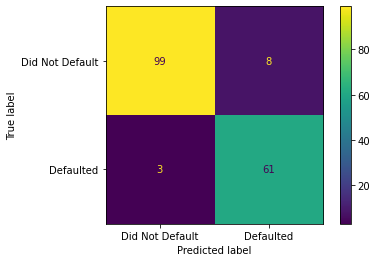

In [15]:
# Training the SVM algorithm 

from sklearn.svm import SVC 

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True) 

modelSVMGaussian.fit(x_train, y_train) 

# Predicting the values 

y2_pred = modelSVMGaussian.predict(x_test) 

# Confusion matrix and classification report 

from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test,y2_pred)) 
print(classification_report(y_test,y2_pred)) 

# Evalution metrics

import sklearn.metrics as metrics 
from sklearn.metrics import roc_curve, roc_auc_score 

print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%") 
print("Precision:", (round(metrics.precision_score(y_test, y2_pred, average='micro') * 100, 2)), '%') 
print("Recall:", (round(metrics.recall_score(y_test, y2_pred, average='micro') * 100, 2)), "%") 
print("f1-score:", round((metrics.f1_score(y_test, y2_pred, average='micro')),3)) 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

# Confusion Matrix 

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import plot_confusion_matrix 

plot_confusion_matrix(modelSVMGaussian, x_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

# Random Forest Algorithm

[[90 17]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       107
           1       0.78      0.97      0.87        64

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.91      0.89      0.89       171

Accuracy: 88.89 %
Precision: 88.89 %
Recall: 88.89 %
f1-score: 0.889
roc_auc_score: 0.905


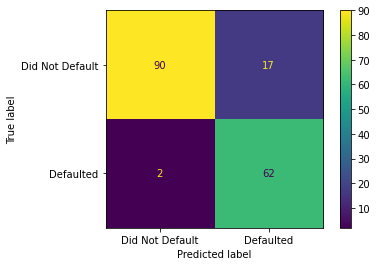

In [16]:
# Build Random Forest classification model and Train the model using the training sets 

from sklearn.ensemble import RandomForestClassifier 

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=None, 
                                 max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                 min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, 
                                 random_state=0, verbose=0, warm_start=False) 
modelRF = modelRF.fit(x_train, y_train) 

# Predict the model with test data set 

y3_pred = modelRF.predict(x_test) 

# Display confusion matrix and classifiction report 

from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y3_pred)) 
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics 

from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score 

# Model Accuracy: how often is the classifier correct? 
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%") 

# Model Precision: what percentage of positive tuples are labeled as such? 
print("Precision:", (round(metrics.precision_score(y_test, y3_pred, average='micro') * 100, 2)), '%') 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:", (round(metrics.recall_score(y_test, y3_pred, average='micro') * 100, 2)), "%") 

# Model f1-score: weighted average of Precision & Recall 
print("f1-score:", round((metrics.f1_score(y_test, y3_pred, average='micro')),3)) 

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3)) 

# Confusion Matrix 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(modelRF, x_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

# Decision Tree with Gini

[[73 34]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       107
           1       0.65      0.98      0.78        64

    accuracy                           0.80       171
   macro avg       0.82      0.83      0.79       171
weighted avg       0.86      0.80      0.80       171

Accuracy: 79.53 %
Precision: 79.53 %
Recall: 79.53 %
f1-score: 0.795
roc_auc_score: 0.833


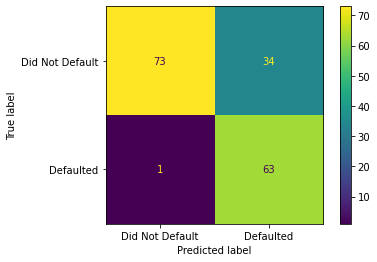

In [17]:
# Train the model and build the 'Decision Tree' Algorithm

from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
# Train the model

modelDTC.fit(x_train, y_train)

# Predict the model with test dataset

y4_pred = modelDTC.predict(x_test)

# Display confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

# Evaluvate the model performance by metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve

# Model Accuracy: how often is the classifier correct? 
print("Accuracy:", (round(metrics.accuracy_score(y_test, y4_pred) * 100, 2)), "%") 

# Model Precision: what percentage of positive tuples are labeled as such? 
print("Precision:", (round(metrics.precision_score(y_test, y4_pred, average='micro') * 100, 2)), '%') 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:", (round(metrics.recall_score(y_test, y4_pred, average='micro') * 100, 2)), "%") 

# Model f1-score: weighted average of Precision & Recall 
print("f1-score:", round((metrics.f1_score(y_test, y4_pred, average='micro')),3)) 

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

# Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelDTC, x_test, y_test, values_format= 'd', display_labels=['Did Not Default', 'Defaulted'])

# Decision Tree with entropy

[[73 34]
 [ 4 60]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       107
           1       0.64      0.94      0.76        64

    accuracy                           0.78       171
   macro avg       0.79      0.81      0.78       171
weighted avg       0.83      0.78      0.78       171

Accuracy: 77.78 %
Precision: 77.78 %
Recall: 77.78 %
f1-score: 0.778
roc_auc_score: 0.81


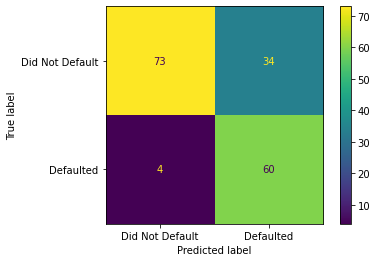

In [18]:
# Train the model and build the 'Decision Tree' Algorithm

from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
# Train the model

modelDTC.fit(x_train, y_train)

# Predict the model with test dataset

y5_pred = modelDTC.predict(x_test)

# Display confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluvate the model performance by metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve

# Model Accuracy: how often is the classifier correct? 
print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%") 

# Model Precision: what percentage of positive tuples are labeled as such? 
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%') 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%") 

# Model f1-score: weighted average of Precision & Recall 
print("f1-score:", round((metrics.f1_score(y_test, y5_pred, average='micro')),3)) 

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

# Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelDTC, x_test, y_test, values_format= 'd', display_labels=['Did Not Default', 'Defaulted'])

# KNN Algorithm

[[100   7]
 [  3  61]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.90      0.95      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 94.15 %
Precision: 94.15 %
Recall: 94.15 %
f1-score: 0.942
roc_auc_score: 0.944


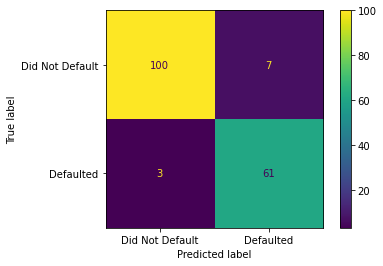

In [19]:
# To build the 'KNN' model 
from sklearn.neighbors import KNeighborsClassifier 

modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                                metric_params=None, n_jobs=None) 
modelKNN = modelKNN.fit(x_train, y_train) 

# Predict the model with test data set 
y6_pred = modelKNN.predict(x_test) 

# Display confusion matrix and classifiction report 
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y6_pred)) 
print(classification_report(y_test, y6_pred)) 

# Evaluate the model performance by metrics 
from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score 
print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%") 
print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%') 
print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%") 
print("f1-score:", round((metrics.f1_score(y_test, y6_pred, average='micro')),3)) 
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3)) 

# Confusion Matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(modelKNN, x_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

# Gradient Boosting

[[87 20]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       107
           1       0.76      0.97      0.85        64

    accuracy                           0.87       171
   macro avg       0.87      0.89      0.87       171
weighted avg       0.89      0.87      0.87       171

Accuracy: 87.13 %
Precision: 87.13 %
Recall: 87.13 %
f1-score: 0.871
roc_auc_score: 0.891


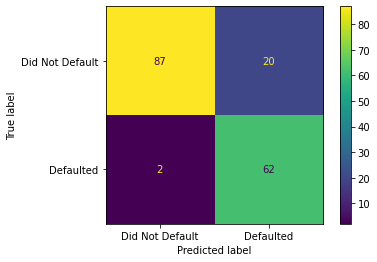

In [20]:
# To build the 'Gradient Boosting' model 
from sklearn.ensemble import GradientBoostingClassifier 
modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                      criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                      min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                      verbose=0, max_leaf_nodes=None, warm_start=False, 
                                      validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0) 
modelXGB = modelXGB.fit(x_train,y_train) 

# Predict the model with test data set 

y7_pred = modelXGB.predict(x_test) 

# Display confusion matrix and classifiction report 
from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y7_pred)) 
print(classification_report(y_test, y7_pred)) 

# Evaluate the model performance by metrics 
from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score 

# Model Accuracy: how often is the classifier correct? 

print("Accuracy:", (round(metrics.accuracy_score(y_test, y7_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such? 
print("Precision:", (round(metrics.precision_score(y_test, y7_pred, average='micro') * 100, 2)), '%') 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:", (round(metrics.recall_score(y_test, y7_pred, average='micro') * 100, 2)), "%") 

# Model f1-score: weighted average of Precision & Recall 
print("f1-score:", round((metrics.f1_score(y_test, y7_pred, average='micro')),3)) 

# Area under ROC curve
print('roc_auc_score:', round(roc_auc_score(y_test, y7_pred), 3)) 

# Confusion Matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

plot_confusion_matrix(modelXGB, x_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

# Logistic Regression

[[101   6]
 [  3  61]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 94.74 %
Precision: 94.74 %
Recall: 94.74 %
f1-score: 0.947
roc_auc_score: 0.949


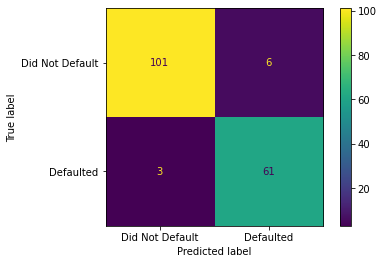

In [21]:
# Train the data with Logistic Regression and with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
                             verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
modelLR.fit(x_train, y_train)

# Predice the model with test dataset

y8_pred = modelLR.predict(x_test)


# Display confusion matrix and classifiction report 
from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y8_pred)) 
print(classification_report(y_test, y8_pred)) 

# Evaluate the model performance by metrics 
from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score 

# Model Accuracy: how often is the classifier correct? 

print("Accuracy:", (round(metrics.accuracy_score(y_test, y8_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such? 
print("Precision:", (round(metrics.precision_score(y_test, y8_pred, average='micro') * 100, 2)), '%') 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:", (round(metrics.recall_score(y_test, y8_pred, average='micro') * 100, 2)), "%") 

# Model f1-score: weighted average of Precision & Recall 
print("f1-score:", round((metrics.f1_score(y_test, y8_pred, average='micro')),3)) 

# Area under ROC curve
print('roc_auc_score:', round(roc_auc_score(y_test, y8_pred), 3)) 

# COnfusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelLR, x_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

# Correct Precision, f1 score and recall values

# Logistic Regression

In [22]:
# To build the 'Logistic Regresson' model with random sampling

from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, 
                             multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, 
                             verbose=0, warm_start=False)

modelLR.fit(x_train, y_train)

# Predict the model with test dataset

y9_pred = modelLR.predict(x_test)

# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values
predicted = y9_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y9_pred), 3))

Confusion matrix : 
 [[ 61   3]
 [  6 101]]
Outcome Values : 
 61 3 6 101
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.95      0.93        64
           0       0.97      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 94.7 %
Precision : 91.0 %
Recall : 95.3 %
F1 Score : 0.931
Balanced Accuracy : 94.8 %
MCC 0.889
roc_auc_score: 0.949


# Decision Tree with Gini

In [31]:
# Train the model and build th 'Decision Tree' Algorithm

from sklearn.tree import DecisionTreeClassifier

modelDTCA = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

# Train the model

modelDTCA.fit(x_train, y_train)

# Predict the model with test dataset

y10_pred = modelDTCA.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y10_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y10_pred), 3))

Confusion matrix: 
 [[63  1]
 [34 73]]
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.98      0.78        64
           0       0.99      0.68      0.81       107

    accuracy                           0.80       171
   macro avg       0.82      0.83      0.79       171
weighted avg       0.86      0.80      0.80       171

Accuracy : 79.5 %
Precison : 64.9 %
Recall : 98.4 %
F1 Score : 0.931
Balanced Accuracy : 83.3 %
MCC 0.651
roc_auc_score:  0.833


# Decision Tree with Entropy

In [32]:
# Train the model and build th 'Decision Tree' Algorithm

from sklearn.tree import DecisionTreeClassifier

modelDTCA = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

# Train the model

modelDTCA.fit(x_train, y_train)

# Predict the model with test dataset

y11_pred = modelDTCA.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y11_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y11_pred), 3))

Confusion matrix: 
 [[63  1]
 [33 74]]
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.98      0.79        64
           0       0.99      0.69      0.81       107

    accuracy                           0.80       171
   macro avg       0.82      0.84      0.80       171
weighted avg       0.86      0.80      0.80       171

Accuracy : 80.1 %
Precison : 65.6 %
Recall : 98.4 %
F1 Score : 0.931
Balanced Accuracy : 83.8 %
MCC 0.659
roc_auc_score:  0.838


# Random Forest 

In [34]:
# Build Random Forest classification model and Train the model using the training sets 

from sklearn.ensemble import RandomForestClassifier 

modelRFA = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=None, 
                                 max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                 min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, 
                                 random_state=0, verbose=0, warm_start=False) 
modelRFA = modelRFA.fit(x_train, y_train) 

# Predict the model with test data set 

y12_pred = modelRFA.predict(x_test) 


# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y12_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y12_pred), 3))


Confusion matrix: 
 [[62  2]
 [17 90]]
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.97      0.87        64
           0       0.98      0.84      0.90       107

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.91      0.89      0.89       171

Accuracy : 88.9 %
Precison : 78.5 %
Recall : 96.9 %
F1 Score : 0.931
Balanced Accuracy : 90.5 %
MCC 0.786
roc_auc_score:  0.905


# KNN Algorithm

In [35]:
# To build the 'KNN' model 
from sklearn.neighbors import KNeighborsClassifier 

modelKNNA = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                                metric_params=None, n_jobs=None) 
modelKNNA = modelKNN.fit(x_train, y_train) 

# Predict the model with test data set 
y13_pred = modelKNNA.predict(x_test) 

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y13_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y13_pred), 3))


Confusion matrix: 
 [[ 61   3]
 [  7 100]]
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.95      0.92        64
           0       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy : 94.2 %
Precison : 89.7 %
Recall : 95.3 %
F1 Score : 0.931
Balanced Accuracy : 94.4 %
MCC 0.878
roc_auc_score:  0.944


# Gradient Boosting

In [36]:
# To build the 'Gradient Boosting' model 
from sklearn.ensemble import GradientBoostingClassifier 
modelXGBA = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                      criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                      min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                      verbose=0, max_leaf_nodes=None, warm_start=False, 
                                      validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0) 
modelXGBA = modelXGB.fit(x_train,y_train) 

# Predict the model with test data set 

y14_pred = modelXGBA.predict(x_test) 

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y14_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y14_pred), 3))


Confusion matrix: 
 [[62  2]
 [19 88]]
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.97      0.86        64
           0       0.98      0.82      0.89       107

    accuracy                           0.88       171
   macro avg       0.87      0.90      0.87       171
weighted avg       0.90      0.88      0.88       171

Accuracy : 87.7 %
Precison : 76.5 %
Recall : 96.9 %
F1 Score : 0.931
Balanced Accuracy : 89.6 %
MCC 0.767
roc_auc_score:  0.896


# SVC ALgorithm - Gaussian Kernal

In [37]:
# Training the SVM algorithm 

from sklearn.svm import SVC 

modelSVMGaussianA = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True) 

modelSVMGaussianA.fit(x_train, y_train) 

# Predicting the values 

y15_pred = modelSVMGaussianA.predict(x_test) 

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y15_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0],sample_weight=None,normalize=None)
print('Confusion matrix: \n', matrix)

# Outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None,normalize=None).reshape(-1)

# Classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# calculating the matrix
sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fn+fp+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1score = round((2*tp/(2*tp+fp+fn)), 3)


# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

x = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp*tn) - (fp*fn))/ sqrt(x), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precison :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

print('roc_auc_score: ', round(roc_auc_score(y_test, y15_pred), 3))


Confusion matrix: 
 [[61  3]
 [ 8 99]]
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.95      0.92        64
           0       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy : 93.6 %
Precison : 88.4 %
Recall : 95.3 %
F1 Score : 0.931
Balanced Accuracy : 93.9 %
MCC 0.866
roc_auc_score:  0.939
